<a href="https://colab.research.google.com/github/alishashaik1259/datascience_masters2021/blob/main/Final_PAMAP2_Assignment_244859_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of PAMAP2 Physical Activity Monitoring dataset

## Background

The PAMAP2 Physical Activity Monitoring dataset contains data from 18 different physical activities (such as walking, cycling, and playing soccer) performed by 9 subjects while wearing three inertial measurement units (IMU) and a heart rate monitor.

The 18 different physical activities and their activityID's are given as follows.
              
              0: 'transient',
              
              1: 'lying',
              
              2: 'sitting',
              
              3: 'standing',
              
              4: 'walking',
              
              5: 'running',
              
              6: 'cycling',
              
              7: 'Nordic_walking',
              
              9: 'watching_TV',
              
              10: 'computer_work',
              
              11: 'car driving',
              
              12: 'ascending_stairs',
              
              13: 'descending_stairs',
              
              16: 'vacuum_cleaning',
              
              17: 'ironing',
              
              18: 'folding_laundry',
              
              19: 'house_cleaning',
              
              20: 'playing_soccer',
              
              24: 'rope_jumping'

## Source

This information was saved in separate text files for each subject. Each row in each file corresponds to a single reading and contains 54 attributes (including timestamp, activity ID, heart rate and IMU sensory data).

## Goal of the report

What actionable insights can be derived from the dataset if the goal is to develop hardware and/or software that can determine the amount and type of physical activity performed by an individual?

1.Carry out thorough exploratory data analysis and appropriately handle missing or dirty data;

2.Develop and test at least one hypothesis for a relationship between a single pair of attributes;

3.Develop and test at least one model which uses multiple attributes to make predictions.

NB:
C– 1 temperature (°C)

ACC16– 2-4 3D-acceleration data (ms-2), scale: ±16g

ACC– 5-7 3D-acceleration data (ms-2), scale: ±6g

G– 8-10 3D-gyroscope data (rad/s)

M– 11-13 3D-magnetometer data (μT)

O– 14-17 orientation (invalid in this data collection)



# Introduction

As said earlier, the mail goal is to develop a software/hardware which predicts the type and amount of activity done by a individual. The PAMAP2 Physical Activity Monitoring dataset is a huge dataset with large amounts of data. First, the suitable imports are done required for the analysis, next the data is loaded into dataframe using `load_subjects_data` function, this function takes, the file path as an input and returns a dataframe. The data in the PAMAP2 dataset is in the form of dat files , with no column names, so, in the `load_subjects_data` function the column names are provided for the dataframe. There are a total of 9 dat files for 9 individuals participated in the study, all these 9 dat files data is converted into a single dataframe `df`, for identification of participant data, a new column called `'subject_id'` is created with subject_id values ranging from 101 to 109 for the participants. The PAMAP2 dataset also has an optional dataset which has additional activities, this was not considered for analysis because of computational issues and also the considered dataset(Protocol) has an abundance of data. The output data frame has 55 columns and 2872533 rows. This dataframe is addressed as `df` going forward.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def load_subjects_data(root='/content/drive/MyDrive/Colab Notebooks/Data Science research methods/Assignments/Final Assignment /PAMAP2_Dataset/Protocol/subject'):
    output = pd.DataFrame()
    cols =['timestamp (s)','activityID','heart rate (bpm)',' hand temperature (°C)','hand 3D acc ±16g x ',' hand 3D acc ±16g y',' hand 3D acc ±16g z',' hand 3D acc ±6g x',' hand 3D acc ±6g y',' hand 3D acc ±6g z',' hand 3D-gyr x',' hand 3D-gyr y' ,' hand 3D-gyr z',' hand 3D-magn x',' hand 3D-magn y',' hand 3D-magn z','hand orientation1','hand orientation2','hand orientation3','hand orientation4',
          ' chest temperature (°C)',' chest 3D acc ±16g x ',' chest 3D acc ±16g y',' chest 3D acc ±16g z',' chest 3D acc ±6g x',' chest 3D acc ±6g y',' chest 3D acc ±6g z',' chest 3D-gyr x',' chest 3D-gyr y' ,' chest 3D-gyr z',' chest 3D-magn x',' chest 3D-magn y',' chest 3D-magn z','chest orientation1','chest orientation2','chest orientation3','chest orientation4',
          ' ankle temperature (°C)',' ankle 3D acc ±16g x ',' ankle 3D acc ±16g y',' ankle 3D acc ±16g z',' ankle 3D acc ±6g x',' ankle 3D acc ±6g y',' ankle 3D acc ±6g z',' ankle 3D-gyr x',' ankle 3D-gyr y' ,' ankle 3D-gyr z',' ankle 3D-magn x',' ankle 3D-magn y',' ankle 3D-magn z','ankle orientation1','ankle orientation2','ankle orientation3','ankle orientation4']
    for i in range(101,110):
        path = root + str(i) +'.dat'
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols 
        subject['subject_id'] = i
        output = output.append(subject, ignore_index=True)
    output.reset_index(drop=True, inplace=True)
    return output

In [ ]:
df = load_subjects_data()
df

,timestamp (s),activityID,heart rate (bpm),hand temperature (°C),hand 3D acc ±16g x,hand 3D acc ±16g y,hand 3D acc ±16g z,hand 3D acc ±6g x,hand 3D acc ±6g y,hand 3D acc ±6g z,hand 3D-gyr x,hand 3D-gyr y,hand 3D-gyr z,hand 3D-magn x,hand 3D-magn y,hand 3D-magn z,hand orientation1,hand orientation2,hand orientation3,hand orientation4,chest temperature (°C),chest 3D acc ±16g x,chest 3D acc ±16g y,chest 3D acc ±16g z,chest 3D acc ±6g x,chest 3D acc ±6g y,chest 3D acc ±6g z,chest 3D-gyr x,chest 3D-gyr y,chest 3D-gyr z,chest 3D-magn x,chest 3D-magn y,chest 3D-magn z,chest orientation1,chest orientation2,chest orientation3,chest orientation4,ankle temperature (°C),ankle 3D acc ±16g x,ankle 3D acc ±16g y,ankle 3D acc ±16g z,ankle 3D acc ±6g x,ankle 3D acc ±6g y,ankle 3D acc ±6g z,ankle 3D-gyr x,ankle 3D-gyr y,ankle 3D-gyr z,ankle 3D-magn x,ankle 3D-magn y,ankle 3D-magn z,ankle orientation1,ankle orientation2,ankle orientation3,ankle orientation4,subject_id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.000000,0.000000,0.000000,0.000000,31.8125,0.238080,9.80003,-1.688960,0.265304,9.81549,-1.413440,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.000000,0.000000,0.000000,0.000000,30.3125,9.65918,-1.655690,-0.099797,9.64689,-1.555760,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,101
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047758,0.006474,14.8991,-69.2224,-5.82311,1.000000,0.000000,0.000000,0.000000,31.8125,0.319530,9.61282,-1.493280,0.234939,9.78539,-1.428460,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.000000,0.000000,0.000000,0.000000,30.3125,9.69370,-1.579020,-0.215687,9.61670,-1.616300,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,101
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.000000,0.000000,0.000000,0.000000,31.8125,0.235593,9.72421,-1.766210,0.173850,9.72528,-1.518940,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.000000,0.000000,0.000000,0.000000,30.3125,9.58944,-1.732760,0.092914,9.63173,-1.586050,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,101
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.000000,0.000000,0.000000,0.000000,31.8125,0.388697,9.53572,-1.724100,0.157969,9.64994,-1.579520,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.000000,0.000000,0.000000,0.000000,30.3125,9.58814,-1.770400,0.054545,9.63197,-1.631350,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,101
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.000000,0.000000,0.000000,0.000000,31.8125,0.315800,9.49908,-1.609140,0.233506,9.57411,-1.444180,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.000000,0.000000,0.000000,0.000000,30.3125,9.69771,-1.656250,-0.060809,9.64699,-1.646470,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,1.784060,0.087985,0.934673,21.1701,-35.3878,-34.04430,0.558630,-0.593878,0.292228,0.499844,32.3750,2.926640,10.21030,-0.983335,3.125630,10.62120,0.642058,-0.034671,-0.222172,-0.191336,15.599100,-40.9116,14.9966,0.625172,-0.760781,-0.039443,-0.169753,31.5000,9.38737,-0.565040,-3.273700,9.09401,-0.228554,-2.687700,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,

# 1.Carry out thorough exploratory data analysis and appropriately handle missing or dirty data.

In this stage the data in the `df` is screened for NaN values, which found to be many in most of the columns, mainly the column `heart rate (bpm)` has lots of NaN values, because the data is captured for heart rate for each micro second and the sensor lost contact while doing activity. Since the `heart rate (bpm)` is one of the important column for analysis, these NaN values are filled with interpolated values using `interpolate` method instead of dropping them, to avoid data loss. Also, the activityID '0' is transient meaning that, in this period there is no activity done, it is just a resting/transition period from one activity to another, hence, the records with activityID `0` are dropped for better analysis. And the NaN's in rest of the columns of the dataframe are very less compared to heart rate (bpm) columns, and hence they were replaced by mean of their respective column.

All these operations explained above are modularised into a function called `clean_data` which takes dataframe as an input and returns cleaned dataframe. The statistical aspects are analysed using describe method, and then the dataframe is scanned for any duplicates, on screening there were no duplicates found. And then the shape, size, number of columns, number of unique subject_id's, unique activityID's are found by grouping by the respective columns.

## Exploratory data analysis (EDA)

In [ ]:
def clean_data(data):
    data = data.drop(data[data['activityID']==0].index)
    data = data.interpolate()
    # fill all the NaN values in a coulmn with the mean values of the column
    for col in data.columns:
        data[col] = data[col].fillna(data[col].mean())
    activity_mean = data.groupby(['activityID']).mean().reset_index()
    return data

df = clean_data(df)

In [ ]:
df.head(5)

,timestamp (s),activityID,heart rate (bpm),hand temperature (°C),hand 3D acc ±16g x,hand 3D acc ±16g y,hand 3D acc ±16g z,hand 3D acc ±6g x,hand 3D acc ±6g y,hand 3D acc ±6g z,hand 3D-gyr x,hand 3D-gyr y,hand 3D-gyr z,hand 3D-magn x,hand 3D-magn y,hand 3D-magn z,hand orientation1,hand orientation2,hand orientation3,hand orientation4,chest temperature (°C),chest 3D acc ±16g x,chest 3D acc ±16g y,chest 3D acc ±16g z,chest 3D acc ±6g x,chest 3D acc ±6g y,chest 3D acc ±6g z,chest 3D-gyr x,chest 3D-gyr y,chest 3D-gyr z,chest 3D-magn x,chest 3D-magn y,chest 3D-magn z,chest orientation1,chest orientation2,chest orientation3,chest orientation4,ankle temperature (°C),ankle 3D acc ±16g x,ankle 3D acc ±16g y,ankle 3D acc ±16g z,ankle 3D acc ±6g x,ankle 3D acc ±6g y,ankle 3D acc ±6g z,ankle 3D-gyr x,ankle 3D-gyr y,ankle 3D-gyr z,ankle 3D-magn x,ankle 3D-magn y,ankle 3D-magn z,ankle orientation1,ankle orientation2,ankle orientation3,ankle orientation4,subject_id
2928,37.66,1,107.487925,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1.0,0.0,0.0,0.0,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,1.0,0.0,0.0,0.0,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,101
2929,37.67,1,107.487925,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1.0,0.0,0.0,0.0,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,1.0,0.0,0.0,0.0,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,101
2930,37.68,1,107.487925,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1.0,0.0,0.0,0.0,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,1.0,0.0,0.0,0.0,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,101
2931,37.69,1,107.487925,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1.0,0.0,0.0,0.0,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,1.0,0.0,0.0,0.0,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,101
2932,37.70,1,100.000000,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1.0,0.0,0.0,0.0,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,1.0,0.0,0.0,0.0,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,101


After eliminating activityID's with 0, the timestamp values were starting from irregular time intervals, in order to make all the activities starting from 0 seconds(which is necessary for determining the amount of activity), the first timestamp value for each subject_id is subtracted from the rest of the timestamp values, this is done using the code below.

In [ ]:
df.loc[df['subject_id']==101,'timestamp (s)'] -= df[df['subject_id']==101]['timestamp (s)'].iloc[0]
df.loc[df['subject_id']==102,'timestamp (s)'] -= df[df['subject_id']==102]['timestamp (s)'].iloc[0]
df.loc[df['subject_id']==103,'timestamp (s)'] -= df[df['subject_id']==103]['timestamp (s)'].iloc[0]
df.loc[df['subject_id']==104,'timestamp (s)'] -= df[df['subject_id']==104]['timestamp (s)'].iloc[0]
df.loc[df['subject_id']==105,'timestamp (s)'] -= df[df['subject_id']==105]['timestamp (s)'].iloc[0]
df.loc[df['subject_id']==106,'timestamp (s)'] -= df[df['subject_id']==106]['timestamp (s)'].iloc[0]
df.loc[df['subject_id']==107,'timestamp (s)'] -= df[df['subject_id']==107]['timestamp (s)'].iloc[0]
df.loc[df['subject_id']==108,'timestamp (s)'] -= df[df['subject_id']==108]['timestamp (s)'].iloc[0]
df.loc[df['subject_id']==109,'timestamp (s)'] -= df[df['subject_id']==109]['timestamp (s)'].iloc[0]

In [ ]:
df.head(5)

,timestamp (s),activityID,heart rate (bpm),hand temperature (°C),hand 3D acc ±16g x,hand 3D acc ±16g y,hand 3D acc ±16g z,hand 3D acc ±6g x,hand 3D acc ±6g y,hand 3D acc ±6g z,hand 3D-gyr x,hand 3D-gyr y,hand 3D-gyr z,hand 3D-magn x,hand 3D-magn y,hand 3D-magn z,hand orientation1,hand orientation2,hand orientation3,hand orientation4,chest temperature (°C),chest 3D acc ±16g x,chest 3D acc ±16g y,chest 3D acc ±16g z,chest 3D acc ±6g x,chest 3D acc ±6g y,chest 3D acc ±6g z,chest 3D-gyr x,chest 3D-gyr y,chest 3D-gyr z,chest 3D-magn x,chest 3D-magn y,chest 3D-magn z,chest orientation1,chest orientation2,chest orientation3,chest orientation4,ankle temperature (°C),ankle 3D acc ±16g x,ankle 3D acc ±16g y,ankle 3D acc ±16g z,ankle 3D acc ±6g x,ankle 3D acc ±6g y,ankle 3D acc ±6g z,ankle 3D-gyr x,ankle 3D-gyr y,ankle 3D-gyr z,ankle 3D-magn x,ankle 3D-magn y,ankle 3D-magn z,ankle orientation1,ankle orientation2,ankle orientation3,ankle orientation4,subject_id
2928,0.00,1,107.487925,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1.0,0.0,0.0,0.0,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,1.0,0.0,0.0,0.0,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,101
2929,0.01,1,107.487925,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1.0,0.0,0.0,0.0,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,1.0,0.0,0.0,0.0,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,101
2930,0.02,1,107.487925,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1.0,0.0,0.0,0.0,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,1.0,0.0,0.0,0.0,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,101
2931,0.03,1,107.487925,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1.0,0.0,0.0,0.0,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,1.0,0.0,0.0,0.0,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,101
2932,0.04,1,100.000000,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1.0,0.0,0.0,0.0,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,1.0,0.0,0.0,0.0,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,101


In [ ]:
df.describe()

,timestamp (s),activityID,heart rate (bpm),hand temperature (°C),hand 3D acc ±16g x,hand 3D acc ±16g y,hand 3D acc ±16g z,hand 3D acc ±6g x,hand 3D acc ±6g y,hand 3D acc ±6g z,hand 3D-gyr x,hand 3D-gyr y,hand 3D-gyr z,hand 3D-magn x,hand 3D-magn y,hand 3D-magn z,hand orientation1,hand orientation2,hand orientation3,hand orientation4,chest temperature (°C),chest 3D acc ±16g x,chest 3D acc ±16g y,chest 3D acc ±16g z,chest 3D acc ±6g x,chest 3D acc ±6g y,chest 3D acc ±6g z,chest 3D-gyr x,chest 3D-gyr y,chest 3D-gyr z,chest 3D-magn x,chest 3D-magn y,chest 3D-magn z,chest orientation1,chest orientation2,chest orientation3,chest orientation4,ankle temperature (°C),ankle 3D acc ±16g x,ankle 3D acc ±16g y,ankle 3D acc ±16g z,ankle 3D acc ±6g x,ankle 3D acc ±6g y,ankle 3D acc ±6g z,ankle 3D-gyr x,ankle 3D-gyr y,ankle 3D-gyr z,ankle 3D-magn x,ankle 3D-magn y,ankle 3D-magn z,ankle orientation1,ankle orientation2,ankle orientation3,ankle orientation4,subject_id
count,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06
mean,1.621965e+03,8.081830e+00,1.074879e+02,3.275126e+01,-4.952973e+00,3.585079e+00,3.602232e+00,-4.886286e+00,3.573597e+00,3.786931e+00,1.480977e-03,3.974584e-02,-3.182852e-03,2.114699e+01,-1.396831e+01,-2.437034e+01,5.658328e-01,-4.135042e-02,-1.213226e-01,-4.817431e-02,3.617908e+01,3.333707e-01,8.152683e+00,-1.450553e+00,1.993197e-01,8.148290e+00,-1.121257e+00,5.575033e-03,1.174622e-02,-2.290167e-02,4.470582e+00,-3.065308e+01,4.585338e+00,5.346176e-01,-3.954376e-01,8.782836e-02,8.694449e-02,3.371194e+01,9.408387e+00,-1.531939e-01,-2.592432e+00,9.378478e+00,-4.550154e-02,-2.174212e+00,9.960309e-03,-3.652767e-02,6.658552e-03,-3.158971e+01,1.396960e+00,1.725039e+01,3.812299e-01,-8.998437e-03,3.023855e-01,-5.698127e-02,1.045664e+02
std,1.098026e+03,6.174789e+00,2.699215e+01,1.794162e+00,6.239663e+00,6.893705e+00,3.956957e+00,6.245972e+00,6.589666e+00,3.942860e+00,1.332331e+00,9.562312e-01,1.598818e+00,2.380841e+01,2.423180e+01,2.007772e+01,3.086261e-01,3.631710e-01,3.333906e-01,5.681133e-01,1.495082e+00,1.742569e+00,4.889461e+00,4.762784e+00,1.738353e+00,4.849979e+00,4.770992e+00,4.498953e-01,5.644552e-01,3.173265e-01,1.704069e+01,1.753230e+01,2.159140e+01,3.007659e-01,3.009480e-01,4.746242e-01,3.691103e-01,1.092343e+00,6.528143e+00,7.739433e+00,3.936154e+00,6.067634e+00,7.190996e+00,3.475429e+00,1.126903e+00,6.383285e-01,2.012898e+00,1.834639e+01,2.168678e+01,1.970652e+01,3.036803e-01,5.714335e-01,3.326730e-01,4.800388e-01,2.333052e+00
min,0.000000e+00,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,-2.813540e+01,-1.784950e+01,-1.426470e+01,-1.039410e+02,-2.000430e+02,-1.649370e+02,1.364250e-07,-9.989440e-01,-9.749160e-01,-9.993260e-01,3.193750e+01,-3.920340e+01,-4.692460e+01,-8.016680e+01,-3.420400e+01,-4.825720e+01,-6.180410e+01,-1.252510e+01,-5.068580e+00,-4.404200e+00,-7.006270e+01,-1.224800e+02,-6.668470e+01,7.710670e-08,-9.994670e-01,-9.996350e-01,-8.801950e-01,3.000000e+01,-1.550680e+02,-1.574430e+02,-1.589260e+02,-6.114200e+01,-6.190640e+01,-6.231480e+01,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.521280e-06,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.010000e+02
25%,6.580200e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.969760e+00,1.058210e+00,1.161470

In [ ]:
#Checking for duplicates
df.duplicated().sum()

0

In [ ]:
print('Shape of the dataframe: ', df.shape)
print('Size of the dataframe: ', df.size)
print('Number of columns in the dataframe: ', len(df.columns))
subjectID_df = df.groupby(['subject_id']).mean().reset_index()
print('Number of uniqe ids in the dataframe: ', len(subjectID_df))
activity_df = df.groupby(['activityID']).mean().reset_index()
print('Numbe of uniqe activityIDs in the dataframe: ',len(activity_df))

Shape of the dataframe:  (1942872, 55)
Size of the dataframe:  106857960
Number of columns in the dataframe:  55
Number of uniqe ids in the dataframe:  9
Numbe of uniqe activityIDs in the dataframe:  12


### Data Visualizations

In this part, the dataframe is thoroughly studied and various aspects are visualised using bar graphs and line graphs. To avoid writing the same code for all the visualizations, a function called `draw_plot` is developed which takes groupby column name, y_val and y_val1 variable for the graph, attribute,colornm and Title for the graph as inputs and returns the bar graph as output. Below are a few observations from the visualizations of the data.

1.From `Number of samples by subject` graph, it was evident that subject_id 109 has very less samples when compared to other subjects and subject 105 has more samples.

2.From `Number of samples by activityID` graph, activity with ID 24, which is rope_jumping has less samples comparatively and activities 4(walking) and 17(ironing) has almost same and has more samples comparatively.

3.`Average Heartrate by subject` graph tells us that, subject 109 has higher rates of heart beat through the study and all the other subjects has similar heart rates.

4.`Average Heartrate by activityID` graph depicts that, activities 5(running) and 24(rope_jumping) has higher hear rates and activities 1(lying) and 2(sitting) has lower heart rates. It is kind of obvious because, activities like running and rope jumping requires a lot of physical effort and thus heart rates are high, whereas, for lying and sitting, it doesn’t require much effort comparatively and hence heart rates are relatively less.

5.From `Average activity by subject` graph, subject 102 has done comparatively high activity and subject 109 has done less activity. The amount of activity here is specified by taking `timestamp (s)` column into consideration.

6.From `Average activity time by activityID` graph, it was found that individuals has done activity 5(running) and 24(rope_jumping) comparatively high and activities 1(lying) and 2(sitting) found to be less.

In [ ]:
def draw_plot(groupby_colname,y_val,y_val1,attribute,colornm,Title ):
  plt.rcParams.update({'font.size': 14})
  if attribute=='mean':
    sample_df=df.groupby([groupby_colname]).mean().reset_index()
  elif attribute=='count':
    sample_df=df.groupby([groupby_colname]).count().reset_index()
    #sample_df['Num of samples']=sample_df[y_val]
  return sample_df.plot.bar(x=groupby_colname,y=y_val, color=colornm,figsize=(10,7),ylabel=y_val1, title=Title,legend=None)

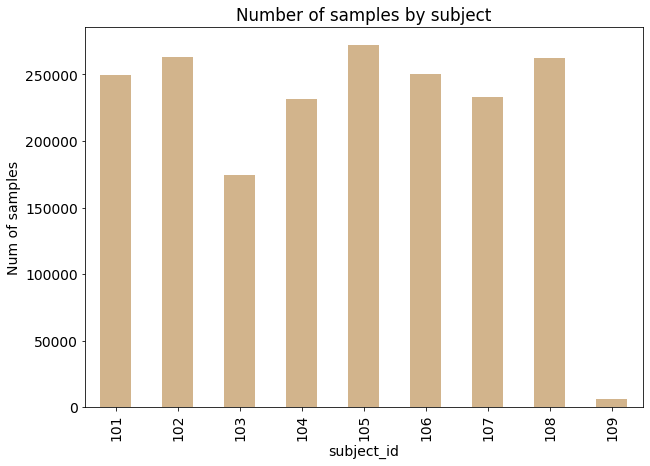

In [ ]:
draw_plot('subject_id','activityID','Num of samples','count','tan','Number of samples by subject')

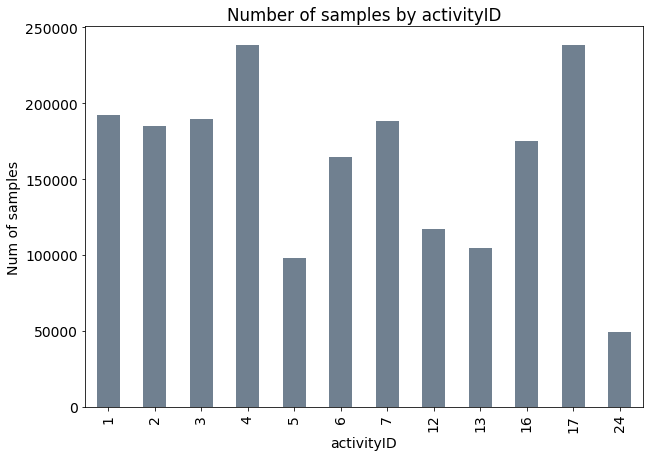

In [ ]:
draw_plot('activityID','subject_id','Num of samples','count','slategrey','Number of samples by activityID')

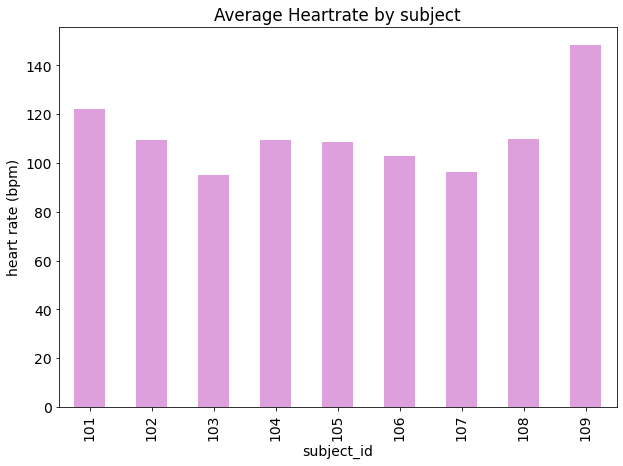

In [ ]:
draw_plot('subject_id','heart rate (bpm)','heart rate (bpm)','mean','plum','Average Heartrate by subject')

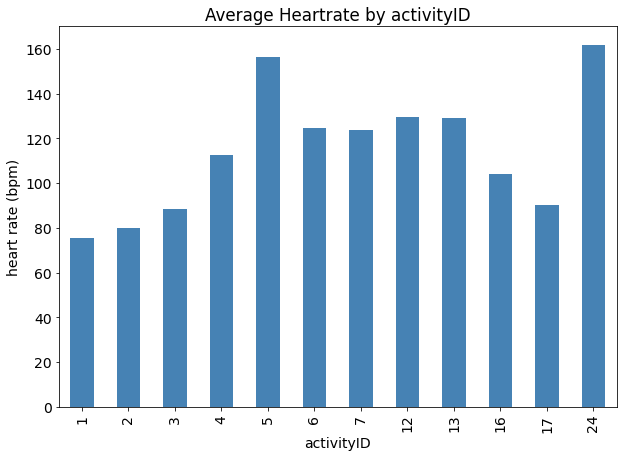

In [ ]:
draw_plot('activityID','heart rate (bpm)','heart rate (bpm)','mean','steelblue','Average Heartrate by activityID')

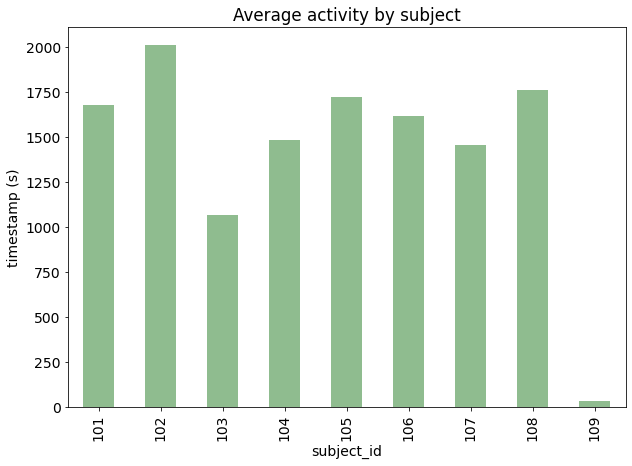

In [ ]:
draw_plot('subject_id','timestamp (s)','timestamp (s)','mean','darkseagreen','Average activity by subject')

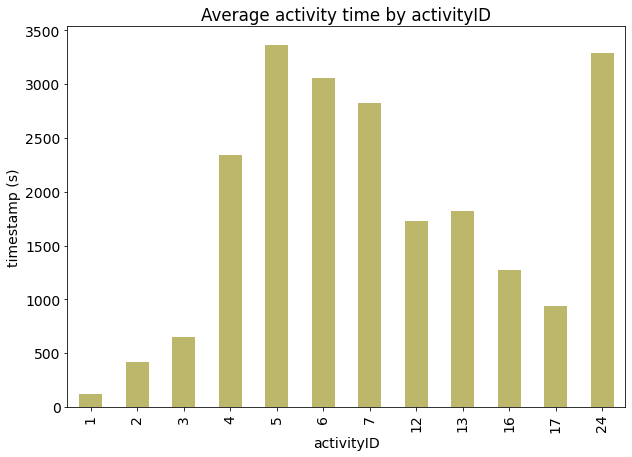

In [ ]:
draw_plot('activityID','timestamp (s)','timestamp (s)','mean','darkkhaki','Average activity time by activityID')

Few more visualizations are done on hand, chest and ankle temperatures of the subjects, using line graphs. Below are the few observations.

1.From `Avg temperatures by Subjects` graph, it was found that chest temperatures are higher for all subjects.

2.Subjects 101,102,103,104,109 has less hand temperatures and 105,106,107,108 has overlapping temperatures for ankle and hand.

3.`Avg Tempatures by activity` graph shows that for all the activities the chest temperatures are more and hand temperatures are lower.

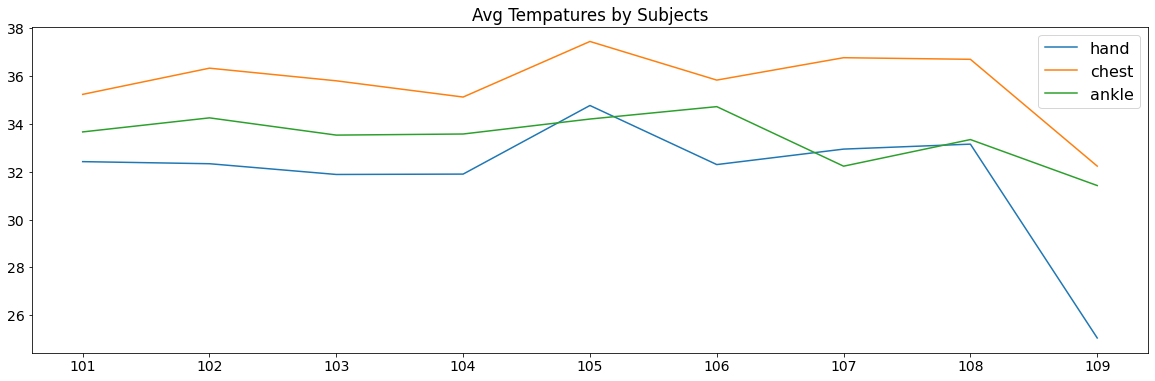

In [ ]:
temperature_df = pd.DataFrame()
temperature_df['hand'] = subjectID_df[' hand temperature (°C)']
temperature_df['chest'] = subjectID_df[' chest temperature (°C)']
temperature_df['ankle'] = subjectID_df[' ankle temperature (°C)']

ax = temperature_df.plot(kind='line', figsize=(20,6), title='Avg Tempatures by Subjects')
ax.set_xticklabels(subjectID_df['subject_id'])
ax.legend(fontsize = 16)
ax.set_xticks(np.arange(len(temperature_df)))

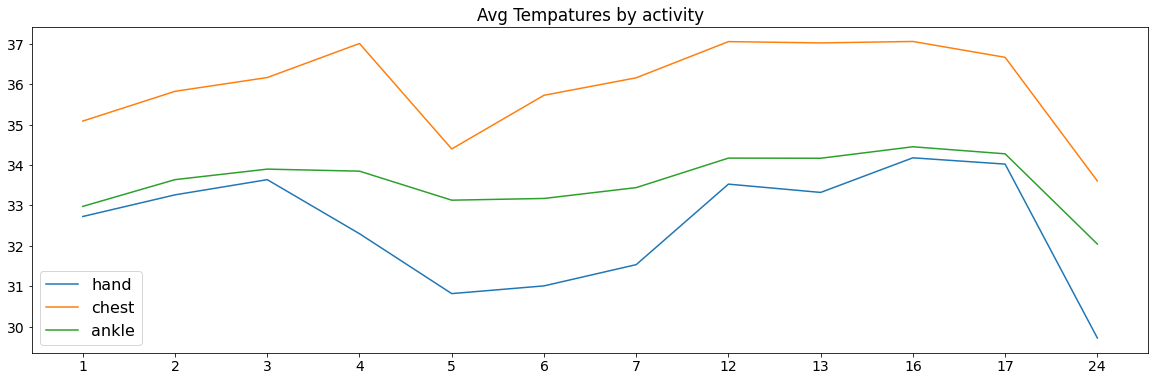

In [ ]:
temperature_df = pd.DataFrame()
temperature_df['hand'] = activity_df[' hand temperature (°C)']
temperature_df['chest'] = activity_df[' chest temperature (°C)']
temperature_df['ankle'] = activity_df[' ankle temperature (°C)']

ax = temperature_df.plot(kind='line', figsize=(20,6), title='Avg Tempatures by activity')
ax.set_xticklabels(activity_df['activityID'])
ax.legend(fontsize = 16)
ax.set_xticks(np.arange(len(temperature_df)))

### Principal Component Analysis(PCA)

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is frequently used to reduce the dimensionality of large data sets by transforming a large set of variables into a smaller set that retains the majority of the information in the large set.

Obviously, reducing the number of variables in a data set reduces accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualise, and because machine learning algorithms can analyse data much more easily and quickly without having to deal with extraneous variables.

To summarise, the idea behind PCA is to reduce the number of variables in a data set while retaining as much information as possible.

This PCA is applied on the data using a function called `PCA` which takes, dataframe and number of principal components as input and returns reduced data with less dimensions as an output. This function has total of 5 steps, each step of this function is explained below.

### Step by Step Explanation of PCA

**1.STANDARDIZATION**

This phase is used to normalise the range of continuous beginning variables so that they all contribute equally to the analysis.

The importance of standardisation prior to PCA is due to the latter's sensitivity to the variances of the initial variables. That is, if the ranges of initial variables differ significantly, the variables with wider ranges will dominate over those with smaller ranges (for example, a variable ranging from 0 to 100 will dominate over a variable ranging from 0 to 1), resulting in biased results. As a result, converting the data to equivalent scales can help to avoid this issue. Subtracting the mean and dividing by the standard deviation for each value of each variable can be done mathematically.

**2.COVARIANCE MATRIX COMPUTATION**

The goal of this stage is to figure out how the variables in the input data set differ from the mean in relation to one another, or to discover if there is a link between them. Because variables might be highly connected to the point where they include duplicated data. We compute the covariance matrix in order to find these associations.

The covariance matrix is a symmetric pxp matrix (where p is the number of dimensions) with the covariances associated with all possible pairs of the initial variables as entries.


**3.COMPUTING THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX IN ORDER TO DETERMINE THE PRINCIPLES COMPONENTS**

The linear algebra notions eigenvectors and eigenvalues that we need to compute from the covariance matrix in order to find the primary components of the data are eigenvectors and eigenvalues.

Principal components are new variables that are created by combining or mixing the basic variables in a linear way. The new variables (i.e., principle components) are uncorrelated as a result of these combinations, and the majority of the information from the initial variables is squeezed or compressed into the first components. So, 10-dimensional data yields ten principal components, but PCA attempts to place the most information in the first component, followed by the most remaining information in the second and so on.

By rejecting the components with poor information and considering the remaining components as your new variables, you can minimise dimensionality without losing much information by organising information in primary components. This is also known as Dimensionality reduction technique.

Because the principal components are generated as linear combinations of the starting variables, it's vital to remember that they're less interpretable and have no meaningful meaning.

**4.FEATURE VECTOR**

We can identify the primary components in order of significance by computing the eigenvectors and sorting them by their eigenvalues in decreasing order, as we saw in the previous step. In this stage, we decide whether to preserve all of these components or to reject those with low eigenvalues, and then build a matrix of vectors called the Feature vector with the remaining ones.

So, the feature vector is just a matrix with the eigenvectors of the components we want to maintain as columns. Because we only keep p eigenvectors (components) out of n, the final data set will only have p dimensions.

**5.RECASTING THE DATA ALONG THE AXES OF THE PRIMARY COMPONENTS**

Apart from standardisation, there are no changes to the data in the preceding phases; you simply select the primary components and build the feature vector, but the input data set is always in terms of the original axes (i.e., in terms of the initial variables).

The goal of this phase, which is the last one, is to reorient the data from the original axes to the ones indicated by the principal components using the feature vector produced using the eigenvectors of the covariance matrix (hence the name Principal Components Analysis). This is accomplished by multiplying the original data set's transpose by the feature vector's transpose.

In [ ]:
data = np.vstack([df])

In [ ]:
data

array([[ 0.00000000e+00,  1.00000000e+00,  1.07487925e+02, ...,
         0.00000000e+00,  0.00000000e+00,  1.01000000e+02],
       [ 1.00000000e-02,  1.00000000e+00,  1.07487925e+02, ...,
         0.00000000e+00,  0.00000000e+00,  1.01000000e+02],
       [ 2.00000000e-02,  1.00000000e+00,  1.07487925e+02, ...,
         0.00000000e+00,  0.00000000e+00,  1.01000000e+02],
       ...,
       [ 6.38800000e+01,  2.40000000e+01,  1.62000000e+02, ...,
         7.06161000e-01, -3.78084000e-01,  1.09000000e+02],
       [ 6.38900000e+01,  2.40000000e+01,  1.62000000e+02, ...,
         7.06426000e-01, -3.77733000e-01,  1.09000000e+02],
       [ 6.39000000e+01,  2.40000000e+01,  1.62000000e+02, ...,
         7.06526000e-01, -3.77800000e-01,  1.09000000e+02]])

In [ ]:
def PCA(data , num_components):
     
    #Step-1
    data_mean = data - data.mean(axis=0)
     
    #Step-2
    cov_mat = np.cov(data_mean , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Sorting
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-4
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-5
    data_reduced = np.dot(eigenvector_subset.transpose(),data_mean.transpose()).transpose()
     
    return data_reduced

Next step is to find out how many PCA components has maximum amount of data, so that the number can be passed to `PCA` function. This can be found out by plotting an elbow curve using `number of components`  and `cumulative explained variance` as its x and y axis. 

Usually, 90-98 percent of the variance will adequately explain our findings. So we could evaluate how many of those we could employ by displaying the variance ratio against the number of components. From this curve , the number of components having maximum information is determined by finding the point on x axis where the curve bends and remains constant. From the below graph, for the dataset it was found that 55 columns of data is reduced into a 10 components having maximum information of around 99% which is pretty good.

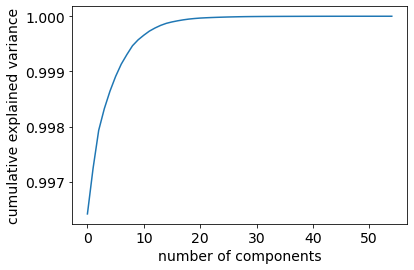

In [ ]:
import sklearn.decomposition as decomp
pca = decomp.PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
PCA(data,10)

array([[-1620.51615567,   -57.76270885,    31.97305848, ...,
           28.40257059,    20.06191869,   -28.10699936],
       [-1620.51669828,   -56.9707101 ,    31.75030433, ...,
           27.81484494,    19.33005904,   -27.7634168 ],
       [-1620.50728349,   -56.93242981,    32.10420464, ...,
           28.27045371,    20.09887699,   -28.70743227],
       ...,
       [-1556.4824542 ,   -14.0301248 ,     6.43449923, ...,
          -36.24772598,    28.23252685,    -4.55550774],
       [-1556.47713782,   -14.13507502,     5.27023015, ...,
          -36.29047529,    28.23060981,    -4.83493893],
       [-1556.466342  ,   -13.6394507 ,     5.90582292, ...,
          -35.20141962,    28.60085468,    -5.21899382]])

In [ ]:
data_reduced=PCA(data,10)

In the next step this reduced data is fed into `principal_df` named dataframe, and columns are named as 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10' for 10 columns of principal components. For the ease of analysis, columns 'timestamp (s)','activityID','subject_id'  from original `df` are added to the principal_df.

In [ ]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(data_reduced , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [ ]:
principal_df['timestamp (s)'] = df['timestamp (s)'].to_numpy()
principal_df['activityID'] = df['activityID'].to_numpy()
principal_df['subject_id'] = df['subject_id'].to_numpy()

In [ ]:
principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,timestamp (s),activityID,subject_id
0,-1620.516156,-57.762709,31.973058,-81.114155,-55.966733,-34.304929,11.289120,28.402571,20.061919,-28.106999,0.00,1,101
1,-1620.516698,-56.970710,31.750304,-81.430812,-55.393760,-34.442628,10.840317,27.814845,19.330059,-27.763417,0.01,1,101
2,-1620.507283,-56.932430,32.104205,-80.261346,-55.178872,-34.653490,11.388406,28.270454,20.098877,-28.707432,0.02,1,101
3,-1620.491561,-57.291572,32.502239,-80.838640,-55.246411,-33.542292,11.147955,27.836704,19.202395,-27.446356,0.03,1,101
4,-1620.638780,-56.232906,31.511980,-78.500714,-55.828409,-31.289929,5.805224,31.362596,18.908832,-28.602657,0.04,1,101


Next, a function called `split_train_test_activity` is developed which takes dataframe as an input and returns the data as X_train, X_test, y_train, y_test splits. In this function, the subjects_id's 107 and 108 are taken as test data and the rest of the data is considered for the training., from the test and train data, the columns subject_id,activityID and timestamp (s) are dropped, and then MinMaxScaler() transformation is applied on data to convert the data scaled between 0 and 1 and then it is fitted and named as X_train and X_test. y_train and y_test are assigned with activityID values.

In a similar way, `split_train_test_time` function is also defined for splitting the data for computing the amount of activity , here y_train_time and y_test_time takes the int values of 'timestamp (s)' column. The timestamp data is taken in int format because, the timestamp values are given for each micro second, and is a continuous data, to make the analysis and predictions easier, all the float timestamp is converted to int. Through this way, the amount of activity can be accurately calculated in seconds(micro seconds are ignored for real world scenario).

In [ ]:
def split_train_test_activity(data1):
    # create the test data
    subject107 = data1[data1['subject_id'] == 107]
    subject108 = data1[data1['subject_id'] == 108]
    test = subject107.append(subject108)

    # create the train data
    train = data1[data1['subject_id'] != 107]
    train = data1[data1['subject_id'] != 108]

    # drop the columns id and time
    test = test.drop(["subject_id"], axis=1)
    train = train.drop(["subject_id"], axis=1)

    # split train and test to X and y
    X_train = train.drop(['activityID','timestamp (s)'], axis=1).values
    X_test = test.drop(['activityID','timestamp (s)'], axis=1).values
    
    # make data scale to min max beetwin 0 to 1
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(X_train)
    min_max_scaler.fit(X_test)
    X_train = min_max_scaler.transform(X_train)
    X_test = min_max_scaler.transform(X_test)
    
    y_train = train['activityID'].values
    y_test = test['activityID'].values
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test_activity(principal_df)
print('Train shape X :',X_train.shape,' y ', y_train.shape)
print('Test shape X :',X_test.shape,' y ', y_test.shape)

Train shape X : (1680770, 10)  y  (1680770,)
Test shape X : (494878, 10)  y  (494878,)


In [ ]:
X_train

array([[2.58779485e-04, 2.23812891e-01, 6.19391184e-01, ...,
        7.49178137e-01, 6.50879158e-01, 3.29939055e-01],
       [2.58637488e-04, 2.28103104e-01, 6.18152181e-01, ...,
        7.44533976e-01, 6.44890895e-01, 3.32987432e-01],
       [2.61101246e-04, 2.28310467e-01, 6.20120645e-01, ...,
        7.48134160e-01, 6.51181560e-01, 3.24611819e-01],
       ...,
       [1.70157616e-02, 4.60709880e-01, 4.77340673e-01, ...,
        2.38316624e-01, 7.17733161e-01, 5.38895547e-01],
       [1.70171528e-02, 4.60141371e-01, 4.70864778e-01, ...,
        2.37978823e-01, 7.17717475e-01, 5.36416343e-01],
       [1.70199780e-02, 4.62826140e-01, 4.74400071e-01, ...,
        2.46584454e-01, 7.20746914e-01, 5.33008883e-01]])

In [ ]:
y_train

array([ 1,  1,  1, ..., 24, 24, 24])

In [ ]:
def split_train_test_time(data1):
    # create the test data
    subject107 = data1[data1['subject_id'] == 107]
    subject108 = data1[data1['subject_id'] == 108]
    test = subject107.append(subject108)

    # create the train data
    train = data1[data1['subject_id'] != 107]
    train = data1[data1['subject_id'] != 108]

    # drop the columns id and time
    test = test.drop(["subject_id"], axis=1)
    train = train.drop(["subject_id"], axis=1)

    # split train and test to X and y
    X_train_time = train.drop(['activityID','timestamp (s)'], axis=1).values
    X_test_time = test.drop(['activityID','timestamp (s)'], axis=1).values
    
    # make data scale to min max beetwin 0 to 1
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(X_train_time)
    min_max_scaler.fit(X_test_time)
    X_train_time = min_max_scaler.transform(X_train_time)
    X_test_time = min_max_scaler.transform(X_test_time)
    
    y_train_time = train['timestamp (s)'].values
    y_train_time=y_train_time.astype(int)
    y_test_time = test['timestamp (s)'].values
    y_test_time=y_test_time.astype(int)
    return X_train_time, X_test_time, y_train_time, y_test_time

X_train_time, X_test_time, y_train_time, y_test_time = split_train_test_time(principal_df)
print('Train shape X :',X_train_time.shape,' y ', y_train_time.shape)
print('Test shape X :',X_test_time.shape,' y ', y_test_time.shape)

Train shape X : (1680770, 10)  y  (1680770,)
Test shape X : (494878, 10)  y  (494878,)


In [ ]:
X_train_time.shape

(1680770, 10)

In [ ]:
y_train_time

array([ 0,  0,  0, ..., 63, 63, 63])

# 2.Develop and test at least one hypothesis for a relationship between a single pair of attributes

Statistical inference is the process of drawing inferences about a population based on data from a sample of that population. Hypothesis testing is a method for determining how reliably one can extrapolate observed findings in a sample under study to the larger population from which the sample was drawn. It is used to assess the strength of evidence from the sample and provides a framework for making population-related decisions. The investigator develops a specific hypothesis, assesses data from the sample, and determines if the results support the hypothesis.

The transformation of the study question into a null hypothesis, H0, and an alternative hypothesis, HA is the first stage in testing hypotheses. The null and alternative hypotheses are short explanations of two possible versions of "truth" concerning the relationship between the predictor of interest and the population outcome, usually in mathematical form. The null hypothesis describes the absence of a relationship between the compared variables; the alternative hypothesis describes the existence of a relationship and is often what the investigator wants to show.

Statistical testing is used to determine whether there is enough evidence from the sample under investigation to suggest that the alternative hypothesis should be accepted.

## Hypothesis Testing

Here for the Hypothesis Testing, a new dataframe called `population_df` is created from the original `df`  with columns 'timestamp (s)','heart rate (bpm)','activityID',' hand temperature (°C)',' chest temperature (°C)'. Nan check and duplicate check is done to make sure there are no Nan values and duplicates.

Next a sample dataframe called `sample_df` with random sample of 100 records is created from `population_df`. 
Since sample size is >30, I have used **z-test** for my two hypothesis testing’s below.

In [ ]:
population_df=df

In [ ]:
population_df.shape

(1942872, 55)

In [ ]:
#column info
population_df.columns

Index(['timestamp (s)', 'activityID', 'heart rate (bpm)',
       ' hand temperature (°C)', 'hand 3D acc ±16g x ', ' hand 3D acc ±16g y',
       ' hand 3D acc ±16g z', ' hand 3D acc ±6g x', ' hand 3D acc ±6g y',
       ' hand 3D acc ±6g z', ' hand 3D-gyr x', ' hand 3D-gyr y',
       ' hand 3D-gyr z', ' hand 3D-magn x', ' hand 3D-magn y',
       ' hand 3D-magn z', 'hand orientation1', 'hand orientation2',
       'hand orientation3', 'hand orientation4', ' chest temperature (°C)',
       ' chest 3D acc ±16g x ', ' chest 3D acc ±16g y', ' chest 3D acc ±16g z',
       ' chest 3D acc ±6g x', ' chest 3D acc ±6g y', ' chest 3D acc ±6g z',
       ' chest 3D-gyr x', ' chest 3D-gyr y', ' chest 3D-gyr z',
       ' chest 3D-magn x', ' chest 3D-magn y', ' chest 3D-magn z',
       'chest orientation1', 'chest orientation2', 'chest orientation3',
       'chest orientation4', ' ankle temperature (°C)',
       ' ankle 3D acc ±16g x ', ' ankle 3D acc ±16g y', ' ankle 3D acc ±16g z',
       ' ankle 3D acc

In [ ]:
#extracing the columns of interest
population_df=population_df[['timestamp (s)','heart rate (bpm)','activityID',' hand temperature (°C)',' chest temperature (°C)']]
population_df.head()

,timestamp (s),heart rate (bpm),activityID,hand temperature (°C),chest temperature (°C)
2928,0.00,107.487925,1,30.375,32.1875
2929,0.01,107.487925,1,30.375,32.1875
2930,0.02,107.487925,1,30.375,32.1875
2931,0.03,107.487925,1,30.375,32.1875
2932,0.04,100.000000,1,30.375,32.1875


In [ ]:
#NaN check
population_df.isnull().sum()

timestamp (s)              0
heart rate (bpm)           0
activityID                 0
 hand temperature (°C)     0
 chest temperature (°C)    0
dtype: int64

In [ ]:
#duplicate check
population_df.duplicated().sum()

0

In [ ]:
#Picking a random sample of 50 records
sample_df=population_df.sample(n=100,random_state=15)
sample_df.head()

,timestamp (s),heart rate (bpm),activityID,hand temperature (°C),chest temperature (°C)
989005,1495.41,96.000000,13,32.1250,36.5000
1576548,1608.42,138.545455,12,35.0000,37.8125
2085686,2954.89,134.000000,6,29.5000,35.1875
2500219,380.47,71.000000,2,34.3125,37.6250
882588,431.24,76.000000,2,31.8125,34.7500


Here various functions are defined for bootstrapping the data, and graph creation for the bootstrapped samples, finding the difference between bootstrap means and for calculating observed difference and respective p values.

In [ ]:
def sample_creation(arg_df):
    empty_df = []
    for i in range(10000):
        np.random.seed(i)
        empty_df.append((resample(arg_df)))

    empty_df = np.mean(empty_df, axis=1)
    return empty_df

In [ ]:
def graph_creation(arg_df,x_variable,title):
    lower_bound = np.percentile(arg_df, 2.5)
    upper_bound = np.percentile(arg_df, 97.5)

    fig = plt.figure(figsize=(10,3))
    ax = plt.hist(arg_df, bins=30)

    plt.xlabel(x_variable)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.axvline(lower_bound, color='r')
    plt.axvline(upper_bound, color='r')
    plt.show()
    
    return(print('Lower bound: {}'.format(lower_bound)),
    print('Upper bound: {}'.format(upper_bound)))

    

In [ ]:
def difference_bootstarp_means(df1,df2):
    combined = np.concatenate((df1, df2), axis=0)

    perms_1 = []
    perms_2 = []

    for i in range(10000):
        np.random.seed(i)
        perms_1.append(resample(combined, n_samples = len(df1)))
        perms_2.append(resample(combined, n_samples = len(df2)))
    
    dif_bootstrap_means = (np.mean(perms_1, axis=1)-np.mean(perms_2, axis=1))
    return dif_bootstrap_means

In [ ]:
def plot_fig(dif_btstrap_mean,x_label,obs_dif):
    fig = plt.figure(figsize=(10,3))
    ax = plt.hist(dif_btstrap_mean, bins=30)

    plt.xlabel(x_label)
    plt.ylabel('Frequency')
    plt.title('Bootstrapped Population (Combined data)')
    plt.axvline(obs_dif, color='r')
    return plt.show()

In [ ]:
def obs_difs_and_p_val(df1,df2):
    obs_difs = (np.mean(df1) - np.mean(df2))
    p_value = dif_bootstrap_means[dif_bootstrap_means >= obs_difs].shape[0]/10000 
    return( print('observed difference in means: {}'.format(obs_difs)),
           print('p-value: {}'.format(p_value)) )

### Hypothesis Test1

Below H0 and Ha are my Null hypothesis and alternative hypothesis, here the relationship between heart rates of activity 24(rope_jumping) and activity 1(lying) is tested.

First, `activity1_df` is created from `sample_df` with records having 'activityID'=1, similarly, `activity24_df` is created with records having 'activityID'=24

From the `activity1_df` and `activity24_df`, it is evident that, the number of records in activity24_df is comparatively less. This would affect the test result, hence to compensate this bootstrapping is performed on both the dataframes.

**Bootstrapping**

Bootstrapping is a statistical process for generating multiple simulated samples from a single dataset. For a variety of sample statistics, this procedure allows you to calculate standard errors, generate confidence intervals, and do hypothesis testing. Bootstrap methods are an alternative to standard hypothesis testing that are easy to understand and valid for a wider range of scenarios.


To estimate sampling distributions, the bootstrap method takes a totally different approach. This method takes a study's sample data and resamples it multiple times to create a large number of simulated samples. The mean, for example, is unique to each of these simulated samples. The sampling distribution of the mean can be shown when plotting the distribution of these means on a histogram.



**H0:μ1−μ0=0   Null hypothesis is there is no difference between activity_24(μ1) and activity_1(μ0) heart rate.**


**Ha:μ1−μ0>0   The alternative hypothesis is there is an increase in the heart rate for activity_24(μ1) than activity_1(μ0) heart rate.**

In [ ]:
#creating a dataframe with movies of comedy genre
activity1_df=sample_df[sample_df['activityID']==1]
activity1_df

,timestamp (s),heart rate (bpm),activityID,hand temperature (°C),chest temperature (°C)
860026,205.62,70.000000,1,31.5000,34.0625
844313,48.49,75.000000,1,31.1875,33.3125
843133,36.69,76.000000,1,31.1875,33.2500
853411,139.47,69.000000,1,31.3750,33.8125
1428310,126.04,72.000000,1,34.8750,36.5625
842577,31.13,77.000000,1,31.1250,33.2500
857777,183.13,76.000000,1,31.4375,33.9375
397171,157.98,75.000000,1,33.7500,37.0625
2169017,187.55,61.000000,1,31.1250,33.9375
403497,221.24,77.000000,1,33.8125,37.1250


In [ ]:
activity24_df=sample_df[sample_df['activityID']==24]
activity24_df

,timestamp (s),heart rate (bpm),activityID,hand temperature (°C),chest temperature (°C)
358756,3558.28,181.0,24,30.1875,33.8750
1774216,3585.10,144.0,24,33.8125,36.4375
787564,4061.91,122.0,24,28.2500,31.9375


In [ ]:
smallsample_1=sample_creation(activity1_df['heart rate (bpm)'])
smallsample_1

array([74.23076923, 74.61538462, 76.37062937, ..., 77.52447552,
       71.61538462, 75.52447552])

The means of bootstrapped sampling for activity1_df and activity24_df is in the form of normal distribution in the graphs with upper and lower bounds as shown below.

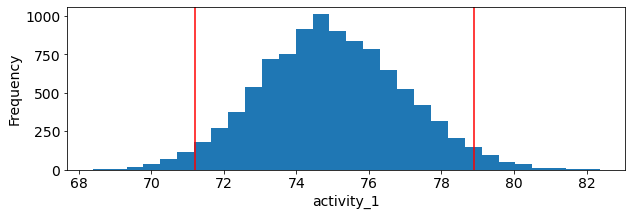

Lower bound: 71.21678321678321
Upper bound: 78.89510489510488


(None, None)

In [ ]:
graph_creation(smallsample_1,'activity_1','')

In [ ]:
smallsample_24=sample_creation(activity24_df['heart rate (bpm)'])
smallsample_24

array([168.66666667, 168.66666667, 168.66666667, ..., 129.33333333,
       168.66666667, 129.33333333])

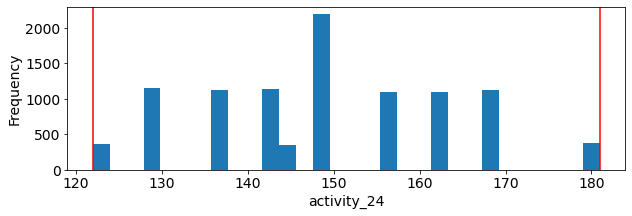

Lower bound: 122.0
Upper bound: 181.0


(None, None)

In [ ]:
graph_creation(smallsample_24,'activity_24','')

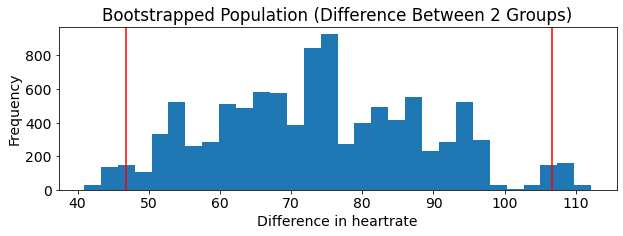

Lower bound: 46.87377622377623
Upper bound: 106.61538461538461


(None, None)

In [ ]:
differences = smallsample_24 - smallsample_1
lower_bound = np.percentile(differences, 2.5)
upper_bound = np.percentile(differences, 97.5)
graph_creation(differences,'Difference in heartrate','Bootstrapped Population (Difference Between 2 Groups)')

0 samples out of 10000 were under or equal 0 assuming an increase did not happen. We are 95% confident that the true difference between activity 24 and activity 1 groups is between 46.8 and 106.6.

In [ ]:
differences[differences <= 0].shape[0]

0

In [ ]:
dif_bootstrap_means=difference_bootstarp_means(smallsample_24, smallsample_1)
dif_bootstrap_means

array([-0.61633473,  0.08962867,  0.41722191, ..., -0.31251375,
        0.52467319, -0.03115035])

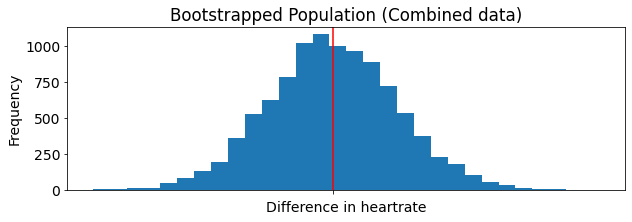

In [ ]:
plot_fig(dif_bootstrap_means,'Difference in heartrate','')

In [ ]:
(obs_diff,p_val)=obs_difs_and_p_val(smallsample_24,smallsample_1)
(obs_diff,p_val)

observed difference in means: 73.93256293706293
p-value: 0.0


(None, None)

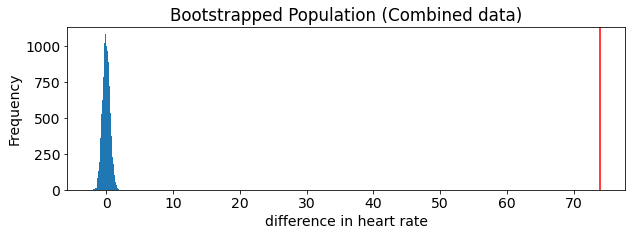

In [ ]:
plot_fig(dif_bootstrap_means,'difference in heart rate',73.93256293706293)

Out of 10,000 bootstrap samples, none of the samples had a difference in means of 73.9 or higher shown by the red line above. Resulting in a **p-value of 0**. This is not a very likely occurence. As a result, we will **reject the null hypothesis**. This proves that there is an **increase in the heart rate for activity_24(μ1) than activity_1(μ0) heart rate.**

### Hypothesis Test2


Below H0 and Ha are my Null hypothesis and alternative hypothesis, here the relationship between IMU chest temperature(μ1)  and IMU hand temperature(μ0) is tested.

**H0:μ1−μ0=0   Null hypothesis is that No difference between IMU chest temperature(μ1) and IMU hand temperature(μ0).**


**Ha:μ1−μ0>0   The alternative hypothesis is that there is an increase in the IMU chest temperature(μ1) than IMU hand temperature(μ0).**

In [ ]:
smallsample_chest=sample_creation(sample_df[' chest temperature (°C)'])
smallsample_chest

array([35.949375, 36.374375, 36.104375, ..., 36.1175  , 36.3775  ,
       36.291875])

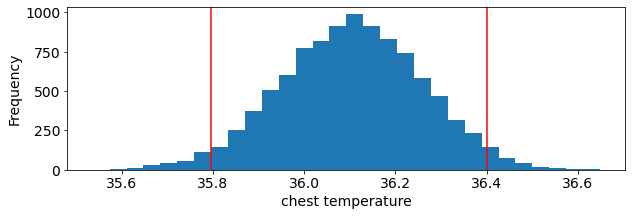

Lower bound: 35.796234375
Upper bound: 36.401875


(None, None)

In [ ]:
graph_creation(smallsample_chest,'chest temperature','')

In [ ]:
smallsample_hand=sample_creation(sample_df[' hand temperature (°C)'])
smallsample_hand

array([32.705625, 32.9675  , 32.730625, ..., 32.671875, 32.99125 ,
       32.65    ])

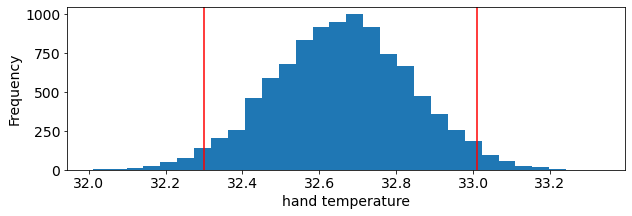

Lower bound: 32.3
Upper bound: 33.01


(None, None)

In [ ]:
graph_creation(smallsample_hand,'hand temperature','')

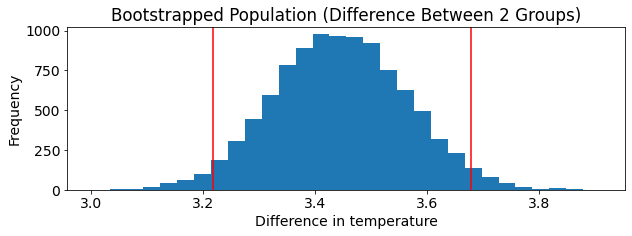

Lower bound: 3.21875
Upper bound: 3.6793750000000003


(None, None)

In [ ]:
differences = smallsample_chest - smallsample_hand
lower_bound = np.percentile(differences, 2.5)
upper_bound = np.percentile(differences, 97.5)
graph_creation(differences,'Difference in temperature','Bootstrapped Population (Difference Between 2 Groups)')

0 samples out of 10000 were under or equal 0 assuming an increase did not happen. We are 95% confident that the true difference between chest temperature and hand temperature groups is between 3.21 and 3.67.

In [ ]:
differences[differences <= 0].shape[0]

0

In [ ]:
dif_bootstrap_means=difference_bootstarp_means(smallsample_chest, smallsample_hand)
dif_bootstrap_means

array([-0.02493713, -0.00475069,  0.02500819, ..., -0.00396463,
        0.02651294,  0.00714488])

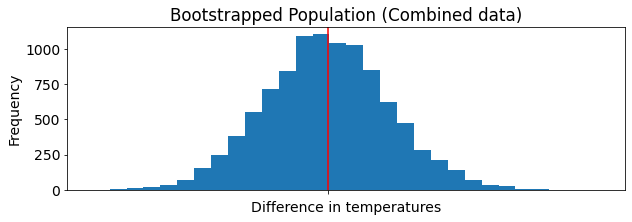

In [ ]:
plot_fig(dif_bootstrap_means,'Difference in temperatures','')

In [ ]:
obs_difs_and_p_val(smallsample_chest,smallsample_hand)

observed difference in means: 3.4452224999999927
p-value: 0.0


(None, None)

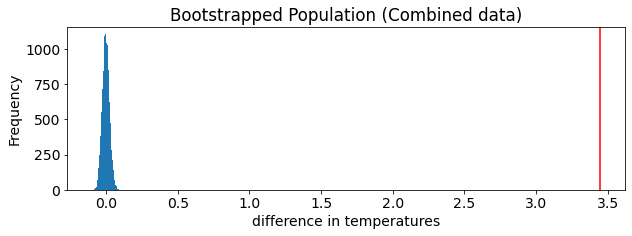

In [ ]:
plot_fig(dif_bootstrap_means,'difference in temperatures',3.4452224999999927)

Out of 10,000 bootstrap samples, none of the samples had a difference in means of 3.44 or higher shown by the red line above. Resulting in a **p-value of 0**. This is not a very likely occurence. As a result, we will **reject the null hypothesis**. This states that there is an **increase in the IMU chest temperature(μ1) than IMU hand temperature(μ0)**.

# 3.Develop and test at least one model which uses multiple attributes to make predictions

## Machine learning model
A machine learning model is a computer programme that has been trained to recognise specific patterns. You train a model on a set of data and give it an algorithm to use to reason about and learn from that data.

Once the model has been trained, you can use it to reason over data it hasn't seen before and make predictions about it. Consider the following scenario: you want to create an app that can understand a user's emotions based on their facial expressions. You can train a model by feeding it photos of faces each labelled with a different emotion, and then use that model in an application to recognise any user's emotion.

The following are common characteristics of good machine learning scenarios:

1.They require consistent results and entail a repeated judgement or evaluation that you want to automate.

2.Explicitly describing the solution or criteria that led to a conclusion is difficult, if not impossible.

3.You have labelled data or examples of how to characterise a scenario and map it to the correct outcome.


## Supervised machine learning 

In the presence of uncertainty, supervised machine learning creates a model that makes predictions based on evidence. A supervised learning technique trains a model to create plausible predictions for the response to incoming data using a known set of input data and known responses to the data (output).

For this problem, supervised machine learning approach is followed, the main reason for choosing this approach is the data used for the analysis is a labelled data, means the target variable is already a part of the data(known data).Hence, supervised machine learning models are utilised.

### Steps in Supervised Learning

**1.Data preparation**

The process of cleaning and altering raw data prior to processing and analysis is known as data preparation. It's a crucial stage before processing that often include reformatting data, making data changes, and integrating data sets to enrich data. This has already been done in the earlier stages on the dataframe `df`.

Also, in order to pass the data to a model, the data should be splitted into X_train, X_test, y_train and y_test. X_train, y_train are used to train the model, and is tested using X_test and y_test.

**2.Algorithm selection**

1.For predicting the type of physical activity, RandomForestClassifier and LogisticRegression is considered.

2.Since, the models taught in module, did not prove to be efficient for determining the amount of physical activity and was having higher execution times,  DecisionTreeRegressor, and RegularisedRegression is considered for determining of the amount of physical activity.

**3.Fitting a model**

Here we need to make sure that data is not overfitted or underfitted, because, over or under fitting may give good accuracy scores, but in real world, they fail(very poor accuracy). Hence, overfitted and underfitted should be avoided for an efficient and effective model.

Here the models are fitted with reduced data from the PCA analysis(principal_df).

1.For predicting the type of physical activity the data is split into X_train, X_test, y_train and y_test using `split_train_test_activity` function. Here the X_train, X_test contains 12 PC columns and y_train, y_test has activityID columns. The model is fitted with X_train, y_train and is tested using X_test and y_test as shown in the below code.

2.For determining the amount of physical activity, the data is studied carefully, and it was found out that the activities are carried by individuals in a sequential manner, that is one activity after the other and the timestamp column indicates a continuous time, for example, if cycling is done from 0 to 10 minutes, next activity standing is started from 10 minutes itself and not recorded from 0 minutes. This gives an understating, that at any particular point, if the model is able to predict the 'timestamp (s)' given the features, the amount of activity done by that individual can be found, which is nothing but the 'timestamp (s)' value. For example, if the model predicts the timestamp value as 35 minutes, it means that the subject has done an activity of 35 minutes.

For this prediction similar to predicting the type of physical activity, a function called `split_train_test_time` is used. Here the X_train, X_test contains 12 PC columns and y_train, y_test has timestamp (s) columns. The model is fitted with X_train, y_train and is tested using X_test and y_test as shown in the below code. Here the predicted test values are also converted to int(ignoring micro seconds) for greater accuracy of the model.


**4.Using fitted model for predictions on train and test data**

Once the model is fitted, it can be used to make predictions. Training predictions are done using X_train and testing predictions are done using X_test, these methods are shown in the below code.

**5.Evaluating the chosen model using a evaluation metric**

1.Here, accuracy is chosen to be the evaluation metric for the models. 

2.Train accuracy is calculated by validating values obtained by executing the model against X_train(y_train_pred) against y_train values.

3.Test accuracy is obtained by validating values obtained by executing the model against X_test(y_test_pred) against y_test values.

## Prediction of type of physical activity

### RandomForestClassifier 

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# prediction on test set
y_pred=clf.predict(X_test)
y_pred_train=clf.predict(X_train)
print("Train Accuracy of RandomForestClassifier is",metrics.accuracy_score(y_train, y_pred_train)*100)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy of RandomForestClassifier is",metrics.accuracy_score(y_test, y_pred)*100)

Train Accuracy of RandomForestClassifier is 100.0
Test Accuracy of RandomForestClassifier is 84.5808461883535


### LogisticRegression

In [ ]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
preds = reg.predict(X_train)
print('Logistic regression accuracy on train: ', accuracy_score(y_train,preds)*100)
preds = reg.predict(X_test)
print('Logistic regression accuracy on test: ', accuracy_score(y_test,preds)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic regression accuracy on train:  82.14169696032175
Logistic regression accuracy on test:  71.37799619300111


After running the model, it was found that RandomForestClassifier gave a test accuracy of 84.58% and Logistic regression accuracy was 71.41% for predicting of type of physical activity . So, ideally, **RandomForestClassifier** is the best method for this problem.

Also the **Random Forest technique** is a versatile modelling algorithm that may be used for both classification and regression. Random Forest is a forest of trees, decision trees that are randomly distributed throughout the forest, as the name implies. The algorithms generate and integrate decision trees; the more trees in the forest, the more accurate the algorithm's forecasts will be.

Random Forest algorithms are useful because of their high accuracy and flexibility, as they may be used for both classification and regression modelling. Furthermore, Random Forest aids in the performance of datasets with high dimensionality, such as ours, whereas the **Logistic Regression** technique is a straightforward algorithm for binary and multivariate classification applications. It yields a chance that a data point belongs to a class.

## Determining of the amount of physical activity

### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_time, y_train_time)
# predict on the train and the test
train_preds = dt.predict(X_train_time)
print('Decision Tree Regressor accuracy on train: ', accuracy_score(y_train_time,train_preds)*100)
test_preds = dt.predict(X_test_time)
test_preds=test_preds.astype(int)
print('Decision Tree Regressor accuracy on test: ', accuracy_score(y_test_time,test_preds)*100)
preds = 0

Decision Tree Regressor accuracy on train:  100.0
Decision Tree Regressor accuracy on test:  75.86051511685709


### RegularisedRegression

In [ ]:
def augmentedx(x,order):
    '''
    create augmented matrix (for polynomial of order given in argument)
    '''
    
    N = np.size(x)
    X=np.zeros((N,order+1))
    #X=X.astype(object)
    for k in range(order+1):
        X[:,k]=np.power(x,k)
    return X

In [ ]:
def regularisedRegression(x,y,order,lam): # Calculate regularised regression parameters
# order: order of the polynomial
# lam: value of the regularisation parameter lambda (NB: lambda is a reserved word in Python so don't use as variable name!)
    N = np.size(x) # how many samples
    X = augmentedx(x,order)
    if lam>0: # if there is regularisation
        w = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)+N*lam*np.eye(order)),np.dot(np.transpose(X),y)) # formula in the lecture notes
    else: # the non-regularised formulation
        w = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),y)) # formula in the lecture notes
    return w,X

In [ ]:
def predict(x,w): # Calculate predictions for a given set of observations x and parameters w (either regularised or not!)
    order = np.size(w) # extract order of polynomial from size of parameters
    X = augmentedx(x,order-1)
    y_pred = np.dot(X,w)
    return y_pred

In [ ]:
def accuracy_measure(y_vals,y_preds):
    correct=0
    index=0
    for j in y_vals:
      #print(j)
      #print(predddd[index])
      if int(y_preds[index])==int(j):
          correct+=1
      index+=1
    accuracy=(correct/len(y_preds))*100
    return accuracy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principal_df['PC1'],principal_df['timestamp (s)'],test_size=0.33, random_state=42)

In [ ]:
res=regularisedRegression(X_train,y_train,1,0)
res

(array([1.62196456e+03, 9.99672297e-01]),
 array([[ 1.00000000e+00, -3.13649448e+02],
        [ 1.00000000e+00,  4.54773163e+02],
        [ 1.00000000e+00,  1.55538791e+03],
        ...,
        [ 1.00000000e+00,  1.32181796e+02],
        [ 1.00000000e+00,  4.90765718e+02],
        [ 1.00000000e+00, -7.71647096e+01]]))

In [ ]:
pred1=predict(X_train,res[0])
pred1

array([1308.41789427, 2076.58869123, 3176.84276644, ..., 1754.10303825,
       2112.56945093, 1544.82513617])

In [ ]:
print('Train accuracy is', accuracy_measure(y_train,pred1))

Train accuracy is 57.23717162777977


In [ ]:
pred2=predict(X_test,res[0])
pred2

array([1120.02088126, 1279.35816643, 2704.32111303, ..., 2261.74805871,
        475.61397845,  220.90647415])

In [ ]:
print('Test accuracy is', accuracy_measure(y_test,pred2))

Test accuracy is 57.330444764703316


After running the model, it was found that DecisionTreeRegressor gave a test accuracy of 75.86% and RegularisedRegression accuracy was 57.33% for determining the amount of physical activity . So, ideally, **DecisionTreeRegressor** is the best method for this problem.

In the shape of a tree structure, a **Decision tree** creates regression or classification models. It incrementally cuts down a dataset into smaller and smaller sections while simultaneously developing a decision tree. A tree containing decision and leaf nodes is the end result.

# Actionable insights 

1.For predicting activity type and determing the amount of activity done by a person, a hardware for physical activity can be developed. As, Fitness trackers are now widely used in our regular physical activities, it would be a nice idea to launch a wearable accessory with this technology to predict the activity and amount.

2.However, there are better models than the above applied ones. In order to get more accurate results, the models like neural_network MLPClassifier,naive bayes, Support Vector Machine etc can be trained and tested on a trial and error basis and the most accurate model can be chosen.(As there is a restriction on the type of model used, these previously mentioned models are opted out in the report).

3.From data perspective, more accurate and efficient IMU sensors should have been used on 9 participants, because the existing ones created a lot of NaN's in the most important 'heart rate(bpm)' column. If this can be fixed, the models trained might be more efficient. 

4.Since the goal is to develop a hardware/software for a larger population, the dataset used for training should comprise of more number of individuals/subjects from all genders and diverse demographics, unlike PAMAP2(has only 9 subjects and only one women). The subject diversity helps the model to train on real world scenarios, in turn producing an efficient hardware/software.